#### Data-Driven Predictive Modeling for Used Vehicle Pricing
<hr>

#### Data Extraction

In [ ]:
orignal_vehicles_df = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/amureboi@gmu.edu/vehicles.csv")
vehicles_df = orignal_vehicles_df

In [ ]:
display(vehicles_df)

id url region region_url price year manufacturer model condition cylinders fuel odometer title_status transmission VIN drive size type paint_color image_url description county state lat long posting_date 7222695916 https://prescott.craigslist.org/cto/d/prescott-2010-ford-ranger/7222695916.html prescott https://prescott.craigslist.org 6000 null null null null null null null null null null null null null null null null null az null null null 7218891961 https://fayar.craigslist.org/ctd/d/bentonville-2017-hyundai-elantra-se/7218891961.html fayetteville https://fayar.craigslist.org 11900 null null null null null null null null null null null null null null null null null ar null null null 7221797935 https://keys.craigslist.org/cto/d/summerland-key-2005-excursion/7221797935.html florida keys https://keys.craigslist.org 21000 null null null null null null null null null null null null null null null null null fl null null null 7222270760 https://worcester.craigslist.org/cto/d/west-brookfield-2002-honda-odyssey-ex/7222270760.html worcester / central MA https://worcester.craigslist.org 1500 null null null null null null null null null null null null null null null null null ma null null null 7210384030 https://greensboro.craigslist.org/cto/d/trinity-1965-chevrolet-truck/7210384030.html greensboro https://greensboro.craigslist.org 4900 null null null null null null null null null null null null null null null null null nc null null null 7222379453 https://hudsonvalley.craigslist.org/cto/d/westtown-2007-ford-150/7222379453.html hudson valley https://hudsonvalley.craigslist.org 1600 null null null null null null null null null null null null null null null null null ny null null null 7221952215 https://hudsonvalley.craigslist.org/cto/d/westtown-silverado-2000/7221952215.html hudson valley https://hudsonvalley.craigslist.org 1000 null null null null null null null null null null null null null null null null null ny null null null 7220195662 https://hudsonvalley.craigslist.org/cto/d/poughquag-2015-acura-rdx-warranty/7220195662.html hudson valley https://hudsonvalley.craigslist.org 15995 null null null null null null null null null null null null null null null null null ny null null null 7209064557 https://medford.craigslist.org/cto/d/grants-pass-two-2002-bmw-tii/7209064557.html medford-ashland https://medford.craigslist.org 5000 null null null null null null null null null null null null null null null null null or null null null 7219485069 https://erie.craigslist.org/cto/d/erie-2012-suzuki-sx4/7219485069.html erie https://erie.craigslist.org 3000 null null null null null null null null null null null null null null null null null pa null null null 7218893038 https://elpaso.craigslist.org/ctd/d/el-paso-2011-chevy-chevrolet-malibu-ls/7218893038.html el paso https://elpaso.craigslist.org 0 null null null null null null null null null null null null null null null null null tx null null null 7218325704 https://elpaso.craigslist.org/ctd/d/el-paso-2017-ford-fusion-platinum-sedan/7218325704.html el paso https://elpaso.craigslist.org 0 null null null null null null null null null null null null null null null null null tx null null null 7217788283 https://elpaso.craigslist.org/ctd/d/el-paso-2013-ford-focus-se-sedan/7217788283.html el paso https://elpaso.craigslist.org 0 null null null null null null null null null null null null null null null null null tx null null null 7217147606 https://elpaso.craigslist.org/ctd/d/el-paso-2019-toyota-4runner-limited/7217147606.html el paso https://elpaso.craigslist.org 0 null null null null null null null null null null null null null null null null null tx null null null 7209027818 https://elpaso.craigslist.org/ctd/d/el-paso-2012-buick-enclave-convenience/7209027818.html el paso https://elpaso.craigslist.org 0 null null null null null null null null null null null null null null null null null tx null null null 7223509794 https://bellingham.craigslist.org/ctd/d/bellingham-2007-mercedes-benz-slk-slk/722350979

In [ ]:
vehicles_df.printSchema()

root
 |-- id: string (nullable = true)
 |-- url: string (nullable = true)
 |-- region: string (nullable = true)
 |-- region_url: string (nullable = true)
 |-- price: string (nullable = true)
 |-- year: string (nullable = true)
 |-- manufacturer: string (nullable = true)
 |-- model: string (nullable = true)
 |-- condition: string (nullable = true)
 |-- cylinders: string (nullable = true)
 |-- fuel: string (nullable = true)
 |-- odometer: string (nullable = true)
 |-- title_status: string (nullable = true)
 |-- transmission: string (nullable = true)
 |-- VIN: string (nullable = true)
 |-- drive: string (nullable = true)
 |-- size: string (nullable = true)
 |-- type: string (nullable = true)
 |-- paint_color: string (nullable = true)
 |-- image_url: string (nullable = true)
 |-- description: string (nullable = true)
 |-- county: string (nullable = true)
 |-- state: string (nullable = true)
 |-- lat: string (nullable = true)
 |-- long: string (nullable = true)
 |-- posting_date: string (nu

In [ ]:
# Number of rows and columns
print(vehicles_df.count(),len(vehicles_df.columns))

441802 26


#### Data Cleaning

In [ ]:
from pyspark.sql.functions import col, sum, when

#Check null values
null_value_counts = vehicles_df.select([sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in vehicles_df.columns])
display(null_value_counts)

id url region region_url price year manufacturer model condition cylinders fuel odometer title_status transmission VIN drive size type paint_color image_url description county state lat long posting_date 0 9884 6901 6533 6446 7890 28937 17506 187143 190798 16344 17801 21618 15932 174486 144178 319997 106892 143839 13732 13733 382283 23077 25397 24715 22477

In [ ]:
# Drop the unnecessary columns
columns_to_drop = ['id', 'url', 'region_url', 'VIN', 'image_url', 'description', 'county', 'lat', 'long', 'posting_date', 'size', 'state']
vehicles_df = vehicles_df.drop(*columns_to_drop)

In [ ]:
# Drop rows where any of the specified columns have missing values
vehicles_df = vehicles_df.dropna(subset=['year', 'odometer', 'manufacturer', 'model'])

In [ ]:
# Fill the null values with 'unknown'
vehicles_df = vehicles_df.fillna('unknown')

In [ ]:
# Drop duplicates
vehicles_df = vehicles_df.dropDuplicates()

In [ ]:
# Number of rows and columns
print(vehicles_df.count(),len(vehicles_df.columns))

346932 14


###### Categorical Data Cleaning

In [ ]:
manufacturer_values = vehicles_df.groupBy("manufacturer").count().orderBy(col("count").desc())
display(manufacturer_values)

manufacturer count ford 60022 chevrolet 46111 toyota 29054 honda 18088 jeep 15913 nissan 15796 ram 14641 gmc 14283 bmw 12802 dodge 11137 mercedes-benz 10083 hyundai 8438 volkswagen 8283 subaru 8193 lexus 7138 kia 6969 audi 6816 cadillac 5911 acura 5469 chrysler 5103 buick 4753 mazda 4702 infiniti 4319 lincoln 3764 volvo 2907 mitsubishi 2874 mini 2090 pontiac 2022 jaguar 1813 rover 1572 porsche 1179 mercury 1005 saturn 932 alfa-romeo 859 tesla 812 fiat 699 harley-davidson 121 ferrari 69 datsun 61 pricing and other specifications are subject to availability 40 overall condition of the vehicle 28 aston-martin 22 land rover 15 pricing 12 Optional Credit Insurance 3 affordable cars 2 E150 1 2015 1 2010 1 Registration Fees 1 recuperaciones anteriores 1 Nissan Silverado 1 40 mpg 1

In [ ]:
top_20_manufacturers = vehicles_df.groupBy("manufacturer").count().orderBy(col("count").desc()).limit(20)
top_20_list = [row['manufacturer'] for row in top_20_manufacturers.collect()]

vehicles_df = vehicles_df.withColumn('manufacturer', when(col('manufacturer').isin(top_20_list), col('manufacturer')).otherwise('others'))

In [ ]:
top_50_regions = vehicles_df.groupBy("region").count().orderBy(col("count").desc()).limit(50)
top_50_list = [row['region'] for row in top_50_regions.collect()]

vehicles_df = vehicles_df.withColumn('region', when(col('region').isin(top_50_list), col('region')).otherwise('others'))

In [ ]:
top_50_models = vehicles_df.groupBy("model").count().orderBy(col("count").desc()).limit(50)
top_50_list = [row['model'] for row in top_50_models.collect()]

vehicles_df = vehicles_df.withColumn('model', when(col('model').isin(top_50_list), col('model')).otherwise('others'))

In [ ]:
for i in vehicles_df.columns:
    unique_count = vehicles_df.select(i).distinct().count()
    print(f"{i}: {unique_count}")

region: 51
price: 15286
year: 119
manufacturer: 21
model: 51
condition: 58
cylinders: 33
fuel: 17
odometer: 101992
title_status: 19
transmission: 82
drive: 12
type: 22
paint_color: 49


###### Numerical Data Cleaning

In [ ]:
display(vehicles_df.describe())

summary region price year manufacturer model condition cylinders fuel odometer title_status transmission drive type paint_color count 346932 346932 346932 346932 346932 346932 346932 346932 346932 346932 346932 346932 346932 346932 mean null 69974.59897590257 2011.5311048514745 null 2198.951354500437 2006.0 2005.0 1752.0 95001.25143091098 -52.220427655172415 -7.7114843888888895 545.0 -95.30773793103448 1122.5 stddev null 1.213387519363691E7 9.229178646859816 null 763.3953031642812 null null 356.38181771801993 184868.14699936882 119.85553505848993 182.62564362860948 null 142.38139916984144 533.8656197958434 min SF bay area 2009 acura 1500 2006 2005 1500 BMW 3 Series 150 250 545 645 1500 max washington, DC VOLKSWAGON*Volkswagen*GTI*gti*volkswagon*90K*2014 Volkswagen Passat 4dr Sdn 1.8T Auto Wolfsburg Ed PZEV 2008 2022 volkswagen wrangler unlimited unknown unknown wa wa unknown unknown unknown wagon yellow

In [ ]:
from pyspark.sql.functions import expr
from pyspark.sql.types import DoubleType

# Convert 'price' column to DoubleType
vehicles_df = vehicles_df.withColumn("price", col("price").cast(DoubleType()))

# Calculate the 25th and 75th percentiles and IQR for 'price'
price_percentile25 = vehicles_df.stat.approxQuantile("price", [0.25], 0)[0]
price_percentile75 = vehicles_df.stat.approxQuantile("price", [0.75], 0)[0]
price_iqr = price_percentile75 - price_percentile25

# Calculate the upper and lower limits
price_upper_limit = price_percentile75 + 1.5 * price_iqr
price_lower_limit = vehicles_df.stat.approxQuantile("price", [0.15], 0)[0]

# Filter the DataFrame based on these limits
new_vehicles_df = vehicles_df.filter((col('price') < price_upper_limit) & (col('price') > price_lower_limit))

In [ ]:
# Convert 'odometer' column to DoubleType
vehicles_df = vehicles_df.withColumn("odometer", col("odometer").cast(DoubleType()))

# Calculate the 25th and 75th percentiles and IQR for 'odometer'
odometer_percentile75 = vehicles_df.stat.approxQuantile("odometer", [0.75], 0)[0]
odometer_percentile25 = vehicles_df.stat.approxQuantile("odometer", [0.25], 0)[0]
odometer_iqr = odometer_percentile75 - odometer_percentile25

# Calculate the upper and lower limits
odometer_upper_limit = odometer_percentile75 + 1.5 * odometer_iqr
odometer_lower_limit = vehicles_df.stat.approxQuantile("odometer", [0.05], 0)[0]

# Filter the DataFrame based on these limits
new_vehicles_df = new_vehicles_df.filter((col('odometer') < odometer_upper_limit) & (col('odometer') > odometer_lower_limit))

In [ ]:
# Number of rows and columns
print(new_vehicles_df.count(),len(new_vehicles_df.columns))

273619 14


#### Data Exploration

In [ ]:
display(new_vehicles_df)

region price year manufacturer model condition cylinders fuel odometer title_status transmission drive type paint_color others 45950.0 2014 gmc others excellent 8 cylinders diesel 154289 clean automatic 4wd truck black others 35990.0 2016 ford f-150 unknown 6 cylinders gas 57838 clean automatic 4wd pickup black others 31590.0 2015 jeep others good 6 cylinders gas 58118 clean other 4wd SUV blue others 30990.0 2018 lexus others good unknown hybrid 27205 clean automatic unknown hatchback silver others 8000.0 1989 jeep wrangler good 4 cylinders gas 161128 clean manual 4wd unknown red others 6499.0 2000 toyota others good 6 cylinders gas 236552 clean automatic rwd unknown black others 21425.0 2013 gmc sierra 1500 unknown 8 cylinders gas 100008 clean automatic 4wd pickup grey others 31990.0 2020 hyundai others good unknown gas 10064 clean other fwd SUV black others 23995.0 2018 jeep others like new 4 cylinders gas 17801 clean automatic 4wd SUV green others 20991.0 2011 gmc others unknown 8 cylinders gas 135636 clean automatic 4wd SUV black others 33995.0 2014 chevrolet silverado unknown unknown other 80032 clean automatic 4wd pickup unknown others 17750.0 2017 others others excellent 4 cylinders gas 9157 clean automatic fwd sedan grey others 53935.0 2020 ram 1500 unknown 8 cylinders gas 24080 clean other 4wd truck unknown others 12345.0 2003 acura others unknown unknown gas 121000 clean automatic unknown unknown unknown others 34750.0 2016 nissan others excellent 8 cylinders diesel 92000 lien automatic 4wd truck silver others 51500.0 2016 ram others like new 6 cylinders diesel 130000 clean automatic 4wd unknown white others 5995.0 1993 others others good 8 cylinders gas 134142 clean automatic unknown sedan unknown others 27990.0 2020 ford others good unknown gas 10688 clean other unknown pickup white others 41990.0 2019 acura others good unknown other 22082 clean other unknown SUV silver others 16000.0 1987 chevrolet others excellent 8 cylinders gas 80000 clean automatic rwd pickup custom others 6700.0 1990 ford f-250 unknown 8 cylinders gas 100000 clean manual unknown truck white others 7250.0 2005 jeep grand cherokee excellent 8 cylinders gas 149500 clean automatic unknown unknown unknown phoenix 18990.0 2018 kia others good unknown gas 21032 clean other unknown other red phoenix 51995.0 2019 chevrolet others unknown 8 cylinders other 18632 clean other unknown other unknown phoenix 21900.0 2015 chevrolet silverado 1500 excellent 8 cylinders gas 101798 clean automatic unknown unknown white phoenix 13950.0 2016 ford others unknown 6 cylinders gas 145000 clean automatic unknown unknown unknown phoenix 5450.0 2013 kia others unknown 4 cylinders gas 69318 rebuilt automatic unknown unknown unknown phoenix 31990.0 2020 toyota others good unknown gas 9261 clean other 4wd pickup silver phoenix 17500.0 2011 gmc sierra 1500 good 8 cylinders gas 160000 clean automatic 4wd unknown silver phoenix 17590.0 2013 others others good 6 cylinders gas 73058 clean automatic unknown sedan white phoenix 10974.0 2011 honda accord unknown 6 cylinders gas 96504 clean automatic fwd coupe silver phoenix 14999.0 2006 toyota sienna excellent 6 cylinders gas 166636 unknown automatic unknown van unknown phoenix 43995.0 2019 ram others unknown 8 cylinders other 32933 clean other unknown other unknown others 39590.0 2017 bmw others good unknown other 29355 clean other unknown other silver others 33590.0 2018 toyota others good 6 cylinders gas 44416 clean other 4wd pickup unknown others 4000.0 1983 cadillac others excellent 8 cylinders gas 28000 clean automatic rwd sedan white tucson 17995.0 2017 honda others excellent 4 cylinders gas 45803 clean other unknown sedan unknown tucson 14995.0 2015 others others excellent 4 cylinders gas 22000 clean automatic fwd sedan black tucson 14500.0 2018 chevrolet malibu excellent unknown gas 58592 clean automatic fwd sedan silver others 20888.0 2015 mercedes-benz others excellent 6 cylinders gas 111261 clean automatic 4wd SUV silv

In [ ]:
from pyspark.sql.types import IntegerType

# Convert 'odometer' and 'year' columns to IntegerType
new_vehicles_df = new_vehicles_df.withColumn("odometer", col("odometer").cast(IntegerType()))
new_vehicles_df = new_vehicles_df.withColumn("year", col("year").cast(IntegerType()))

In [ ]:
from pyspark.sql.functions import avg

# average price for each year
avg_price_per_year = new_vehicles_df.groupBy('year').agg(avg('price').alias('avg_price')).orderBy('year')
display(avg_price_per_year)

year avg_price 1905 3990.0 1915 5000.0 1918 16000.0 1922 15000.0 1923 18290.0 1924 16250.0 1926 15925.0 1927 17599.0 1928 22841.14285714286 1929 18284.157894736843 1930 21418.75 1931 17331.785714285714 1932 33523.42105263158 1933 24560.0 1934 38863.846153846156 1935 24850.0 1936 21396.5625 1937 22757.5 1938 13468.75 1939 19008.333333333332 1940 23667.842105263157 1941 15617.78947368421 1942 23833.333333333332 1943 9750.0 1944 6500.0 1946 16802.85714285714 1947 20851.470588235294 1948 18020.0 1949 14157.142857142857 1950 17360.454545454544 1951 17798.060606060608 1952 21223.214285714286 1953 15830.346153846154 1954 13832.5 1955 25389.939393939392 1956 21034.166666666668 1957 23839.0 1958 14820.774193548386 1959 18635.791666666668 1960 19081.22857142857 1961 16659.322580645163 1962 17053.19230769231 1963 18211.967391304348 1964 16299.142857142857 1965 20785.97409326425 1966 18005.577114427862 1967 19503.006944444445 1968 20916.119658119656 1969 20044.95294117647 1970 19868.340136054423 1971 17982.00606060606 1972 18633.36842105263 1973 14624.838150289017 1974 12722.613636363636 1975 12788.90322580645 1976 13193.63 1977 11732.868965517242 1978 12515.35465116279 1979 14285.645933014353 1980 13975.463087248321 1981 11258.936936936936 1982 13092.892561983472 1983 10784.8671875 1984 11042.434579439252 1985 11253.80985915493 1986 12438.865051903114 1987 12511.298449612403 1988 11819.383870967742 1989 11233.134146341463 1990 10597.280597014926 1991 10679.424778761062 1992 13740.003003003003 1993 10078.570200573065 1994 10703.629166666668 1995 10446.861022364217 1996 10868.287394957983 1997 10181.256551724138 1998 10067.823095823096 1999 10709.757553426676 2000 9729.44756554307 2001 10076.961977186313 2002 9264.886363636364 2003 9004.371016071915 2004 9112.779580530272 2005 9179.586479802143 2006 9305.978561281157 2007 9835.283038610443 2008 10331.26399237567 2009 9851.0189511323 2010 11149.639821029083 2011 14061.043172827718 2012 15372.363910753389 2013 16814.300087248015 2014 19636.262846227317 2015 22328.325986673502 2016 24012.902739124067 2017 26434.210574804725 2018 29240.260212668298 2019 31683.62469028741 2020 35099.08482965009 2021 36138.75384615385 2022 9708.333333333334

Databricks visualization. Run in Databricks to view.

In [ ]:
# We can see that car data prior to 1996 is completely irrelevant. As a result, we are pulling all car data available after 1996.
new_vehicles_df = new_vehicles_df.filter(col('year') > 1996)

In [ ]:
# Number of rows and columns
print(new_vehicles_df.count(),len(new_vehicles_df.columns))

264819 14


In [ ]:
from pyspark.sql.functions import lit
from pyspark.sql.functions import rand

# Create a new column 'car_age' based on the 'year' column
new_vehicles_df = new_vehicles_df.withColumn("car_age", lit(2022) - new_vehicles_df['year'])

# Drop the 'year' column
new_vehicles_df = new_vehicles_df.drop('year')

display(new_vehicles_df.describe())

summary region price manufacturer model condition cylinders fuel odometer title_status transmission drive type paint_color car_age count 264819 264819 264819 264819 264819 264819 264819 264819 264819 264819 264819 264819 264819 264819 mean null 19557.929616077396 null 2140.9318444358873 null null null 90413.38947734113 null null null null null 9.066207485112473 stddev null 12047.30974293144 null 746.1742581117995 null null null 57072.787351418214 null null null null null 4.909892081006101 min SF bay area 3525.0 acura 1500 excellent 10 cylinders diesel 6935 clean automatic 4wd SUV black 0 max washington, DC 58448.0 volkswagen wrangler unlimited unknown unknown unknown 278456 unknown unknown unknown wagon yellow 25

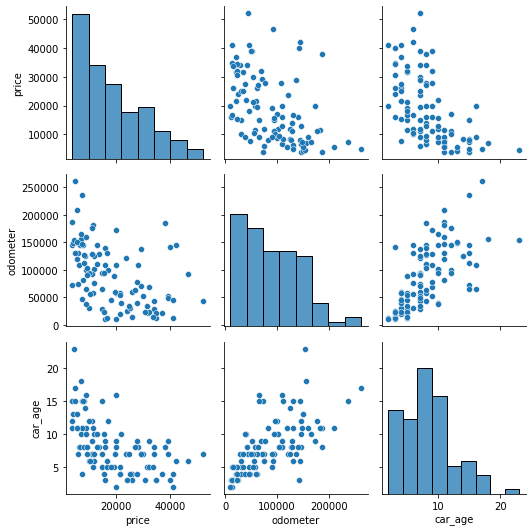

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample approximately 100 rows and convert to Pandas DataFrame
sample_data_pd = new_vehicles_df.orderBy(rand()).limit(100).toPandas()

# Create a pair plot
sns.pairplot(sample_data_pd)
plt.tight_layout()

# Save the plot
plt.savefig('Insight-Pair-Plot', dpi=None)

# Show the plot
plt.show()

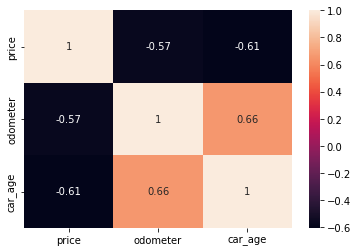

In [ ]:
from pyspark.sql.types import NumericType
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
import pandas as pd

# Select only numeric columns for correlation
numeric_cols = [field.name for field in new_vehicles_df.schema.fields if isinstance(field.dataType, NumericType)]

# Convert DataFrame columns to a single vector column
vector_col = "corr_features"
assembler = VectorAssembler(inputCols=numeric_cols, outputCol=vector_col)
df_vector = assembler.transform(new_vehicles_df).select(vector_col)

# Compute the correlation matrix
matrix = Correlation.corr(df_vector, vector_col)

# Extract the correlation matrix
corr_matrix = matrix.collect()[0][0].toArray()

# Convert to pandas DataFrame
corr_matrix_df = pd.DataFrame(corr_matrix, columns=numeric_cols, index=numeric_cols)

# Create a heatmap
sns.heatmap(corr_matrix_df, annot=True)

# Show the plot
plt.show()

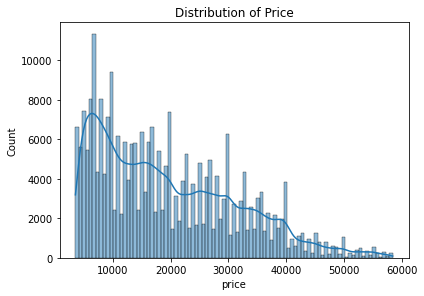

In [ ]:
# Convert the 'price' column to a pandas DataFrame
price_pd = new_vehicles_df.select('price').toPandas()

# Create a distribution plot (using histplot as distplot is deprecated)
sns.histplot(price_pd['price'], kde=True)
plt.tight_layout()
plt.title("Distribution of Price")
plt.savefig('Insight-Dist-Plot', dpi=None)
plt.show()

In [ ]:
# Aggregate data to get the average price for each fuel type
avg_price_per_fuel = new_vehicles_df.groupBy('fuel').agg(avg('price').alias('avg_price'))
display(avg_price_per_fuel)

fuel avg_price gas 18139.157365725103 unknown 19941.377947295423 other 27029.88459926419 diesel 30859.06113658469 hybrid 15479.411749615187 electric 25721.774580335732

Databricks visualization. Run in Databricks to view.

In [ ]:
# Aggregate data to get the average price for each combination of fuel and condition
avg_price_per_fuel_condition = new_vehicles_df.groupBy('fuel', 'condition').agg(avg('price').alias('avg_price'))
display(avg_price_per_fuel_condition)

fuel condition avg_price gas excellent 14603.021634496105 gas like new 18132.407785926043 diesel unknown 34624.6137040715 other excellent 19082.02564102564 unknown unknown 19857.921418636997 gas salvage 9027.416666666666 gas fair 6277.385304659499 electric excellent 22006.880503144654 diesel excellent 29171.500595592614 diesel good 25269.777777777777 hybrid excellent 10905.490924805532 hybrid unknown 15801.750679963736 gas good 20997.869448101574 hybrid good 19219.897142857142 gas new 18138.93667546174 electric good 27375.248 diesel fair 10486.666666666666 other unknown 22017.066058131157 diesel like new 32372.484375 electric unknown 23620.303571428572 hybrid like new 14886.790697674418 hybrid fair 4732.285714285715 electric like new 24876.77966101695 diesel salvage 11702.692307692309 other like new 22009.32 other good 28329.823787002977 gas unknown 18622.059308497566 hybrid new 13956.42857142857 electric new 5995.0 hybrid salvage 9650.0 other fair 11872.5 electric fair 35000.0 electric salvage 25000.0 unknown excellent 49944.0 diesel new 29479.0

Databricks visualization. Run in Databricks to view.

#### Data Preprocessing

In [ ]:
# Create separate Dataframe for modeling
final_vehicles_df = new_vehicles_df

In [ ]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler
from pyspark.ml import Pipeline

# Define the stages of the pipeline
stages = []

# Ordinal encoding for 'condition'
condition_indexer = StringIndexer(inputCol='condition', outputCol='condition_indexed')
stages += [condition_indexer]

# One-hot encoding for categorical columns
categorical_columns = ['model', 'region', 'manufacturer', 'fuel', 'cylinders', 'title_status', 'transmission', 'drive', 'type', 'paint_color']
for categorical_col in categorical_columns:
    string_indexer = StringIndexer(inputCol=categorical_col, outputCol=categorical_col + '_indexed', handleInvalid='keep')
    encoder = OneHotEncoder(inputCols=[string_indexer.getOutputCol()], outputCols=[categorical_col + '_ohe'])
    stages += [string_indexer, encoder]

# StandardScaler for 'odometer'
assembler_numerical = VectorAssembler(inputCols=['odometer'], outputCol='odometer_vec')
scaler = StandardScaler(inputCol='odometer_vec', outputCol='odometer_scaled')
stages += [assembler_numerical, scaler]

# Assemble all the features into a single vector column
assembler_inputs = [c + '_ohe' for c in categorical_columns] + ['condition_indexed', 'odometer_scaled']
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol='features')
stages += [assembler]

###### Splitting the data

In [ ]:
# Split the data into training and test sets
train_df, test_df = final_vehicles_df.randomSplit([0.8, 0.2], seed=42)

In [ ]:
# Create and run the pipeline
pipeline = Pipeline(stages=stages)
pipeline_model = pipeline.fit(train_df)
train_df_transformed = pipeline_model.transform(train_df)
test_df_transformed = pipeline_model.transform(test_df)

In [ ]:
# Number of rows and columns in train_df_transformed and test_df_transformed
print(train_df_transformed.count(),len(train_df_transformed.columns))
print(test_df_transformed.count(),len(test_df_transformed.columns))

212080 38
52739 38


In [ ]:
# Select only the features vector and the label column
train_model_df = train_df_transformed.select('features', 'price')
test_model_df = test_df_transformed.select('features', 'price')

#### Predivtive Modeling

###### Linear Regression

In [ ]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Define the linear regression model
lr = LinearRegression(featuresCol='features', labelCol='price')

# Train the model
lr_model = lr.fit(train_model_df)

# Make predictions
lr_predictions = lr_model.transform(test_model_df)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol='price', predictionCol='prediction')
lr_r2 = evaluator.evaluate(lr_predictions, {evaluator.metricName: "r2"})
lr_mse = evaluator.evaluate(lr_predictions, {evaluator.metricName: "mse"})
lr_mae = evaluator.evaluate(lr_predictions, {evaluator.metricName: "mae"})
lr_rmse = evaluator.evaluate(lr_predictions, {evaluator.metricName: "rmse"})

# Print the evaluation metrics
print('R2_score:', lr_r2)
print('Mean squared error:', lr_mse)
print('Mean absolute error:', lr_mae)
print('Root mean squared error:', lr_rmse)

R2_score: 0.6526757157413033
Mean squared error: 50356335.28573571
Mean absolute error: 5386.306181922231
Root mean squared error: 7096.219788432128


###### Decision Tree Regression

In [ ]:
from pyspark.ml.regression import DecisionTreeRegressor

# Define the Decision Tree Regressor model
dt = DecisionTreeRegressor(featuresCol='features', labelCol='price')

# Train the model on the training data
dt_model = dt.fit(train_model_df)

# Make predictions on the test data
dt_predictions = dt_model.transform(test_model_df)

# Evaluate the model
dt_r2 = evaluator.evaluate(dt_predictions, {evaluator.metricName: "r2"})
dt_mse = evaluator.evaluate(dt_predictions, {evaluator.metricName: "mse"})
dt_mae = evaluator.evaluate(dt_predictions, {evaluator.metricName: "mae"})
dt_rmse = evaluator.evaluate(dt_predictions, {evaluator.metricName: "rmse"})

# Print the evaluation metrics
print('R2 score:', dt_r2)
print('Mean squared error:', dt_mse)
print('Mean absolute error:', dt_mae)
print('Root mean squared error:', dt_rmse)

R2 score: 0.5786244687993305
Mean squared error: 61092553.82368098
Mean absolute error: 5881.072427933626
Root mean squared error: 7816.172581492874


###### Random Forest Regression

In [ ]:
from pyspark.ml.regression import RandomForestRegressor

# Define the Random Forest Regressor model
rf = RandomForestRegressor(featuresCol='features', 
                           labelCol='price', numTrees=150,
                           featureSubsetStrategy='0.3',
                           minInstancesPerNode=1,
                           seed=0)

# Train the model
rf_model = rf.fit(train_model_df)

# Make predictions
rf_predictions = rf_model.transform(test_model_df)

# Evaluate the model
rf_r2 = evaluator.evaluate(rf_predictions, {evaluator.metricName: "r2"})
rf_mse = evaluator.evaluate(rf_predictions, {evaluator.metricName: "mse"})
rf_mae = evaluator.evaluate(rf_predictions, {evaluator.metricName: "mae"})
rf_rmse = evaluator.evaluate(rf_predictions, {evaluator.metricName: "rmse"})

# Print the metrics
print('R2_score:', rf_r2)
print('Mean squared error:', rf_mse)
print('Mean absolute error:', rf_mae)
print('Root mean squared error:', rf_rmse)

R2_score: 0.5929902766062727
Mean squared error: 59009746.86959538
Mean absolute error: 5924.599968760821
Root mean squared error: 7681.780188836138


#### Results

In [ ]:
from pyspark.sql import Row
from pyspark.sql.functions import format_number

# Create a list of Rows containing the model names and their respective metrics
data = [
    Row(model="Linear Regression", R2_score=lr_r2, Accuracy = lr_r2*100, MSE=lr_mse, MAE=lr_mae, RMSE=lr_rmse),
    Row(model="Decision Tree Regressor", R2_score=dt_r2, Accuracy = dt_r2*100, MSE=dt_mse, MAE=dt_mae, RMSE=dt_rmse),
    Row(model="Random Forest Regressor", R2_score=rf_r2, Accuracy = rf_r2*100, MSE=rf_mse, MAE=rf_mae, RMSE=rf_rmse)
]

# Convert the list to a DataFrame
results_df = spark.createDataFrame(data)

# Apply the rounding to each column
results_df = results_df.withColumn("R2_score", format_number("R2_score", 4)) \
                       .withColumn("Accuracy", format_number("Accuracy", 2)) \
                       .withColumn("MSE", format_number("MSE", 2)) \
                       .withColumn("MAE", format_number("MAE", 2)) \
                       .withColumn("RMSE", format_number("RMSE", 2))

# Show the rounded results
display(results_df)

model R2_score Accuracy MSE MAE RMSE Linear Regression 0.6527 65.27 50,356,335.29 5,386.31 7,096.22 Decision Tree Regressor 0.5786 57.86 61,092,553.82 5,881.07 7,816.17 Random Forest Regressor 0.5930 59.30 59,009,746.87 5,924.60 7,681.78

Databricks visualization. Run in Databricks to view.